# Notebook showing process of loading data, fitting PLS model, transforming data, and plotting in 3D
#### Brandon Chan | July 2021

In [2]:
import os # For filesystem navigation
import pandas as pd # For dataframe/data manipulation
import numpy as np # For linear algebra and scietific computing
import plotly.express as px
import joblib # For saving fitted PLS and model objects
from sklearn.preprocessing import StandardScaler, label_binarize #Standardization and conversion of categorical labels to binary representation
from sklearn.cross_decomposition import PLSRegression # For PLS 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #for LDA
from sklearn.model_selection import RepeatedStratifiedKFold #for testing LDA accuracy
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

# May need to uncomment and adjust the next two lines if script file is in different location than helper_function.py
import sys
sys.path.insert(0,"../")
from helper_functions import * 

## Loading method 1: Loading/processing data from csvs in separate folders

In [15]:
#
# Initialize data preprocessing parameters
#
SGpoly = 3
SGframe = 9
wlow = 500
whigh = 3500
wspace = whigh - wlow + 1
wave = np.linspace(wlow, whigh, wspace)
wave_numb = wave.transpose() 

#
# Load datasets
#

data_gnu, labels_gnu = prepare_training_data(r"C:\Users\User\Downloads\SERS Files\GNU\\",
                                                         label_name='GNU',
                                                         file_type='txt',
                                                         SGpoly=SGpoly,
                                                         SGframe=SGframe,
                                                         wlow=wlow,
                                                         whigh=whigh,
                                                         wave_numb=wave_numb,
                                                         header = 12)
files_gnu = os.listdir(r"C:\Users\User\Downloads\SERS Files\GNU")
files_gnu = [x for x in files_gnu if x.split('.')[-1] == 'txt']

data_gnp, labels_gnp = prepare_training_data(r"C:\Users\User\Downloads\SERS Files\GNP\\",
                                                         label_name='GNP',
                                                         file_type='txt',
                                                         SGpoly=SGpoly,
                                                         SGframe=SGframe,
                                                         wlow=wlow,
                                                         whigh=whigh,
                                                         wave_numb=wave_numb,
                                                         header = 12)
files_gnp = os.listdir(r"C:\Users\User\Downloads\SERS Files\GNP")
files_gnp = [x for x in files_gnp if x.split('.')[-1] == 'txt']

data_peg, labels_peg = prepare_training_data(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Functionalization\RS\GNU-PEG\\",
                                                         label_name='GNU-PEG',
                                                         file_type='txt',
                                                         SGpoly=SGpoly,
                                                         SGframe=SGframe,
                                                         wlow=wlow,
                                                         whigh=whigh,
                                                         wave_numb=wave_numb,
                                                         header = 12)
files_peg = os.listdir(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Functionalization\RS\GNU-PEG")
files_peg = [x for x in files_peg if x.split('.')[-1] == 'txt']

data_adh, labels_adh = prepare_training_data(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Functionalization\RS\GNU-PEG-ADH\\",
                                                         label_name='GNU-PEG-ADH',
                                                         file_type='txt',
                                                         SGpoly=SGpoly,
                                                         SGframe=SGframe,
                                                         wlow=wlow,
                                                         whigh=whigh,
                                                         wave_numb=wave_numb,
                                                         header = 12)
files_adh = os.listdir(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Functionalization\RS\GNU-PEG-ADH")
files_adh = [x for x in files_adh if x.split('.')[-1] == 'txt']


data_mab, labels_mab = prepare_training_data(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Conjugation\RS\\",
                                                         label_name='GNU-PEG-ADH-mAb',
                                                         file_type='txt',
                                                         SGpoly=SGpoly,
                                                         SGframe=SGframe,
                                                         wlow=wlow,
                                                         whigh=whigh,
                                                         wave_numb=wave_numb,
                                                         header = 12)
files_mab = os.listdir(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Conjugation\RS")
files_mab = [x for x in files_mab if x.split('.')[-1] == 'txt']


data_her, labels_her = prepare_training_data(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Interaction\RS\\", 
                                                         label_name='GNU-PEG-ADH-mAb-HER-II',
                                                         file_type='txt',
                                                         SGpoly=SGpoly,
                                                         SGframe=SGframe,
                                                         wlow=wlow,
                                                         whigh=whigh,
                                                         wave_numb=wave_numb)
files_her = os.listdir(r"C:\Users\Student003\Downloads\Nick\PCB-mAb Experiment\PCB-Hexane-GNU-PEG-ADH-mAb\50nm\Interaction\RS")
files_her = [x for x in files_her if x.split('.')[-1] == 'txt']


# Combine loaded datasets
#
combined_spectra = np.concatenate([data_gnu, data_peg, data_adh, data_mab, data_her])
combined_labels = np.concatenate([labels_gnu, labels_peg, labels_adh, labels_mab, labels_her])
combined_labels_binary = label_binarize(combined_labels, classes=['GNU','GNU-PEG', 'GNU-PEG-ADH','GNU-PEG-ADH-mAb','GNU-PEG-ADH-mAb-HER-II'])
combined_filenames = np.concatenate([files_gnu, files_peg, files_adh, files_mab, files_her])

#second_data = np.concatenate([data_mab, data_her]) 
#second_labels = np.concatenate([labels_mab, labels_her])
#second_labels_binary = label_binarize(second_labels, classes=['GNU-PEG-ADH-mAb','GNU-PEG-ADH-mAb-HER-II'])
#second_filenames = np.concatenate([files_mab, files_her])

## Fit and extract using PLS

In [ ]:
pls = PLSRegression(n_components=5) # Initialize a PLS object, specifying 5 components
pls.fit(combined_spectra, combined_labels_binary) # Fit to the training data w/ binary label set
transformed_pls_data = pls.x_scores_ # Extract the computed components on the training data

#Create pls_df, a dataframe containing the PLSRegression values and identity of each spectra columns
pls_df = pd.DataFrame({'p1':transformed_pls_data[:, 0], 'p2':transformed_pls_data[:, 1],'p3':transformed_pls_data[:, 2],'p4':transformed_pls_data[:, 3], 'p5':transformed_pls_data[:, 4]})
pls_df['label'] = combined_labels
pls_df['filename'] = combined_filenames

#pls2 = PLSRegression(n_components=5) # Initialize a PLS object, specifying 10 components
#pls2.fit(second_data, second_labels_binary ) # Fit to the training data w/ binary label set
#transformed_pls2_data = pls2.x_scores_ # Extract the computed components on the training data

#pls2_df = pd.DataFrame({'p1':transformed_pls2_data[:, 0], 'p2':transformed_pls2_data[:, 1],'p3':transformed_pls2_data[:, 2],'p4':transformed_pls2_data[:, 3], 'p5':transformed_pls2_data[:, 4]})
#pls2_df['label'] = second_labels
#pls2_df['filename'] = second_filenames

## Loading in more data and using the pre-fitted PLS on it

# Make Plot

In [5]:
fig = px.scatter_3d(pls_df, x='p1', y='p2', z='p3',
                    color='label',
                    symbol='label', opacity=0.7,
#                   hover_data=['label', 'filename','substance1', 'concentration1', 'substance2', 'concentration2'])

#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
                   )

In [6]:
figgg = px.scatter(pls_df, x='p1', y='p2', color = 'label', symbol = 'label')

In [20]:

fig.data[0].marker.color = 'blue'
fig.data[2].marker.color = 'grey'
fig.data[3].marker.color = '#F7D609'
fig.data[4].marker.color = 'green'

fig.data[0].marker.symbol = 'circle'

fig.update_traces(marker=dict(size=5))


In [8]:
fig2 = px.scatter_3d(pls2_df, x='p1', y='p2', z='p3',
                    color='label',
                    symbol='label', opacity=0.7,
                   )
fig2.data[0].marker.color = 'grey'
fig2.data[1].marker.color = '#f5a020'
fig2.data[0].marker.symbol = 'square'
fig2.data[1].marker.symbol = 'x'
fig2.update_traces(marker=dict(size=5))

In [17]:

model = LinearDiscriminantAnalysis()

X = pls_df[['p1','p2','p3','p4','p5']]

y = pls_df['label']

model.fit(X, y)

#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

1.0


C:\Users\Student003\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning:

Y residual is constant at iteration 15

C:\Users\Student003\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning:

Y residual is constant at iteration 15

C:\Users\Student003\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning:

Y residual is constant at iteration 15

C:\Users\Student003\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning:

Y residual is constant at iteration 15



Max accuracy:  1.0
Number of PLS components:  2


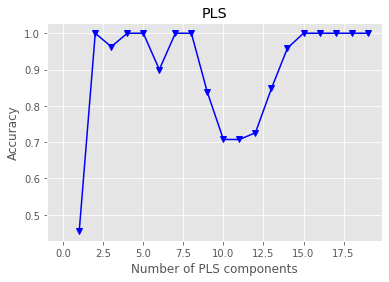

In [18]:
X = combined_spectra
y = combined_labels_binary
n_comp = 20
mse = []
component = np.arange(1, n_comp)

model = LinearDiscriminantAnalysis()

for i in component:
    pls = PLSRegression(n_components=i)
    pls.fit(X, y)
    transformed_pls_data = pls.x_scores_
    dataframe = pd.DataFrame(transformed_pls_data)
    labelid = combined_labels
        # Cross-validation
    y_cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
    

    mse.append(np.mean(cross_val_score(model, dataframe, labelid, scoring='accuracy', cv=cv, n_jobs=-1)))
 
    comp = 100*(i+1)/40
        # Trick to update status on the same line

 
    # Calculate and print the position of minimum in MSE
msemax = np.max(mse)
print("Max accuracy: ", + msemax)
count = 1
for i in mse:
    if i == msemax:
        break
    else:
        count = count+1
print("Number of PLS components: ", + count)

with plt.style.context(('ggplot')):
    plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
    #plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
    plt.xlabel('Number of PLS components')
    plt.ylabel('Accuracy')
    plt.title('PLS')
    plt.xlim(left=-1)
 
    plt.show()

In [14]:

model = LinearDiscriminantAnalysis()

X = pls2_df[['p1','p2','p3']]

y = pls2_df['label']

model.fit(X, y)

#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

1.0


In [27]:
X = second_data
y = second_labels_binary
n_comp = 25
mse = []
component = np.arange(1, n_comp)

model = LinearDiscriminantAnalysis()

for i in component:
    pls = PLSRegression(n_components=i)
    pls.fit(X, y)
    transformed_pls_data = pls.x_scores_
    dataframe = pd.DataFrame(transformed_pls_data)
    labelid = combined_labels
        # Cross-validation
    y_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    

    mse.append(np.mean(cross_val_score(model, dataframe, labelid, scoring='accuracy', cv=cv, n_jobs=-1)))
 
    comp = 100*(i+1)/40
        # Trick to update status on the same line

 
    # Calculate and print the position of minimum in MSE
msemax = np.max(mse)
print("Max accuracy: ", + msemax)
count = 1
for i in mse:
    if i == msemax:
        break
    else:
        count = count+1
print("Number of PLS components: ", + count)

with plt.style.context(('ggplot')):
    plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
    #plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
    plt.xlabel('Number of PLS components')
    plt.ylabel('MSE')
    plt.title('PLS')
    plt.xlim(left=-1)
 
    plt.show()

ValueError: could not convert string to float: 'GNU-PEG-ADH-mAb'

SyntaxError: invalid syntax (2276360871.py, line 5)